In [1]:
pip install --upgrade InsufficientGibbs

Note: you may need to restart the kernel to use updated packages.


In [1]:
import InsufficientGibbs

In [2]:
from Models import ParetoModel, ParetoType2Model
from Distribution import Gamma
from Model import *

In [3]:
from scipy.stats import pareto

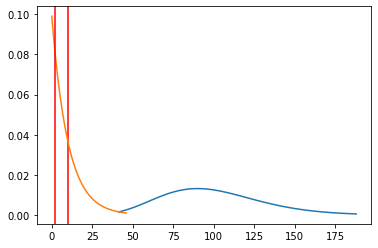

In [54]:
P = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
true_scale, true_b = 10, 2
Q = pareto(b = true_b,scale = true_scale).ppf(P)

scale = Gamma(10,10,name = 'scale')
shape = Gamma(10,1, name = "b")

law = scale._distribution
x = np.linspace(law.ppf(0.01), law.ppf(0.99), 100)
plt.plot(x, law.pdf(x), label='gamma pdf')
plt.axvline(true_scale, color = 'r', label = 'True scale')

law = shape._distribution
x = np.linspace(law.ppf(0.01), law.ppf(0.99), 100)
plt.plot(x, law.pdf(x), label='gamma pdf')
plt.axvline(true_b, color = 'r', label = 'True b')


In [39]:
model = ParetoModel(scale, shape)
test = model.Gibbs_Quantile(10000,1000, Q,P, std_prop_dict={'scale':.01,'b':.1})

{'scale': 9.540925533894598, 'b': 0.24858261776603083}


100%|██████████| 10000/10000 [01:30<00:00, 110.45it/s]


Acceptance rate of the order statistics (100) = 53.89%
Acceptance rate of the order statistics (200) = 54.90%
Acceptance rate of the order statistics (300) = 55.97%
Acceptance rate of the order statistics (400) = 56.52%
Acceptance rate of the order statistics (500) = 56.20%
Acceptance rate of the order statistics (600) = 56.54%
Acceptance rate of the order statistics (700) = 55.69%
Acceptance rate of the order statistics (800) = 56.05%
Acceptance rate of the order statistics (900) = 53.84%
Acceptation rates MH : scale = 34.10% b = 57.25% 


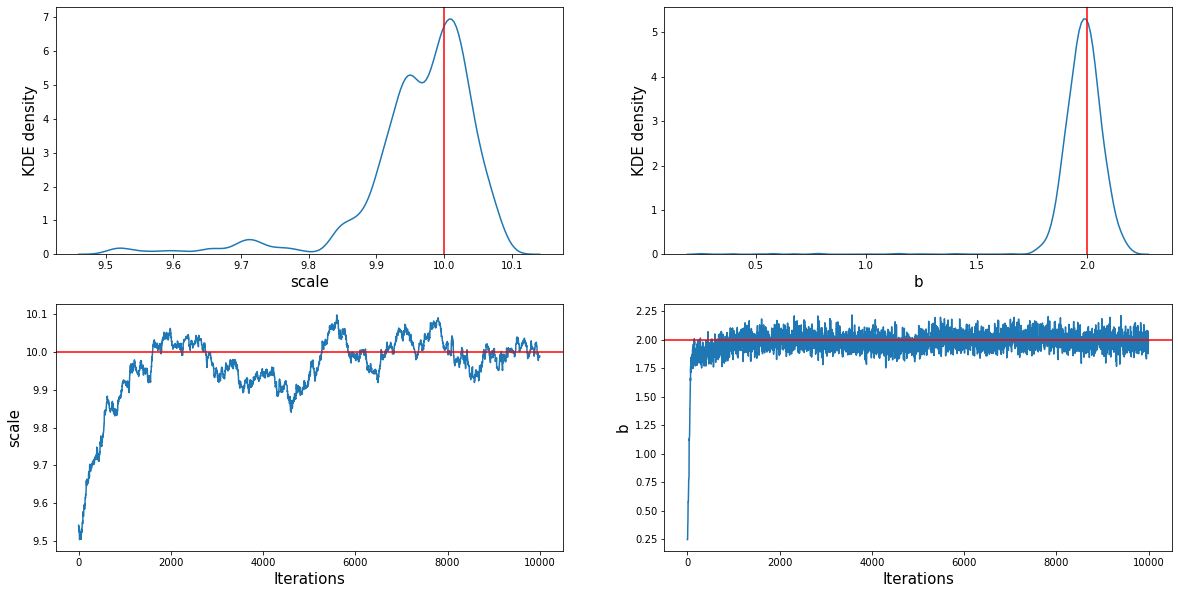

In [42]:
display_chains(test, true_par=[10,2])

In [5]:
from Distribution import ParetoType2

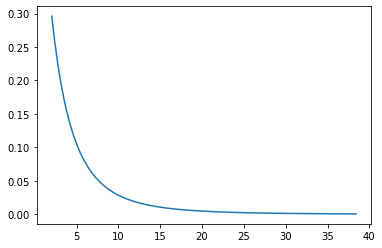

In [7]:
p2 = ParetoType2(2,10,3)
law = p2._distribution
x = np.linspace(law.ppf(0.01), law.ppf(0.99), 100)
plt.plot(x, law.pdf(x), label='gamma pdf')
P = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
Q = law.ppf(P)

In [12]:
loc = Normal(0,10, name = 'loc')
scale = Gamma(10,1,name = 'scale')
shape = Gamma(10,1, name = "b")

model = ParetoType2Model(loc, scale, shape)
test = model.Gibbs_Quantile(100000,1000, Q,P, std_prop_dict={'loc':.01,'scale':1,'b':.1})

{'loc': 1.9427099228663063, 'scale': 7.616141587099023, 'b': 2.5}


100%|██████████| 100000/100000 [03:17<00:00, 506.68it/s]


Acceptance rate of the order statistics (100) = 53.81%
Acceptance rate of the order statistics (200) = 54.82%
Acceptance rate of the order statistics (300) = 55.50%
Acceptance rate of the order statistics (400) = 55.82%
Acceptance rate of the order statistics (500) = 56.35%
Acceptance rate of the order statistics (600) = 56.19%
Acceptance rate of the order statistics (700) = 55.77%
Acceptance rate of the order statistics (800) = 55.14%
Acceptance rate of the order statistics (900) = 54.03%
Acceptation rates MH : loc = 24.97% scale = 47.49% b = 71.57% 


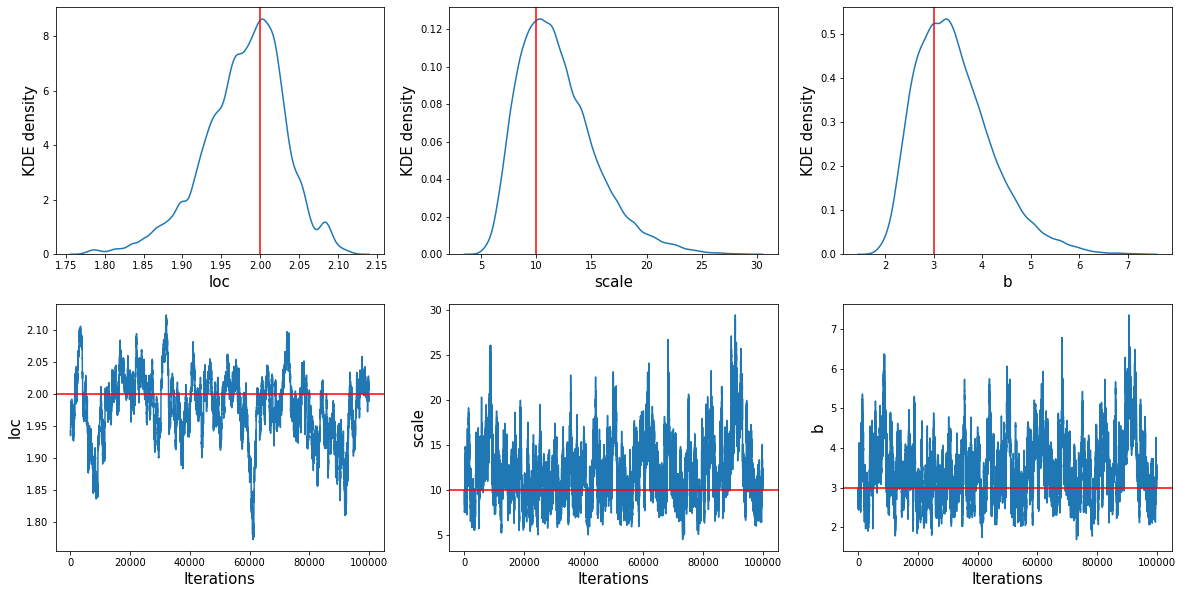

In [13]:
display_chains(test, true_par=[2,10,3])

In [2]:
from Distribution import Normal, Gamma
from Models import CauchyModel

# Creating the prior distributions variables
mu = Normal(0,10, name= "x_0")
sigma = Gamma(2,2, name = "gamma")

# Creating the model variable
model = CauchyModel(mu,sigma)

T, N = 10000, 100

# Quantile case 
q1, med, q3 = -1, 0, 1
probs = [.25, .5, .75]
Cauchy_Q = model.Gibbs_Quantile(T, N, [q1, med, q3], probs)

med, IQR = 0, 2
Cauchy_med_IQR = model.Gibbs_med_IQR(T, N, med, IQR) 

# Median, MAD case
med, MAD = 0, 1
Cauchy_med_MAD = model.Gibbs_med_MAD(T, N, med, MAD)

Initialization done: {'x_0': 0, 'gamma': 1.0000000000000002}


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:52<00:00, 191.68it/s]


Acceptance rate of the order statistics (25) = 65.03%
Acceptance rate of the order statistics (50) = 66.56%
Acceptance rate of the order statistics (75) = 65.59%
Acceptation rates MH : x_0 = 79.68% gamma = 78.88% 
N = 100
I = [25 50 75]
Initialization done: {'x_0': 0, 'gamma': 1.0}


100%|██████████| 10000/10000 [01:21<00:00, 123.13it/s]


Acceptance rate of the order statistics (25) = 61.16%
Acceptance rate of the order statistics (50) = 33.55%
Acceptance rate of the order statistics (75) = 47.52%
Acceptance rate of the order statistics (76) = 62.75%
Acceptation rates MH : x_0 = 79.24% gamma = 79.66% 
Initialization done: {'x_0': 0, 'gamma': 1}


100%|██████████| 10000/10000 [00:31<00:00, 318.18it/s]

Acceptation rates MH : x_0 = 79.68% gamma = 78.64% 


In [5]:
from Model import display_chains

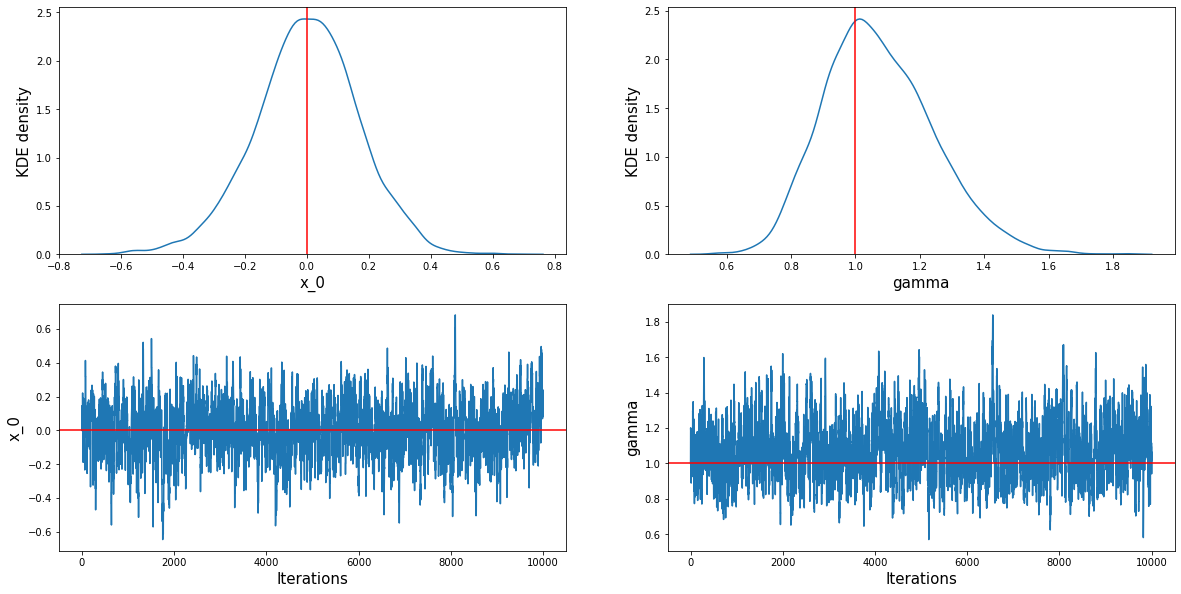

In [6]:
display_chains(Cauchy_Q, true_par=[0,1])

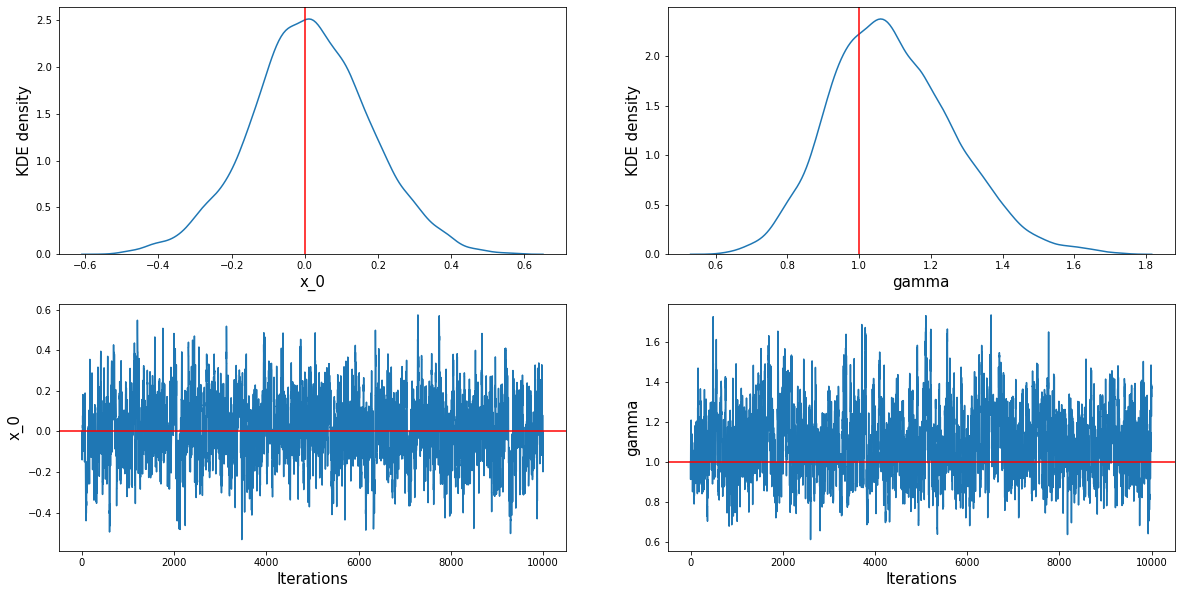

In [8]:
display_chains(Cauchy_med_IQR, true_par=[0,1])

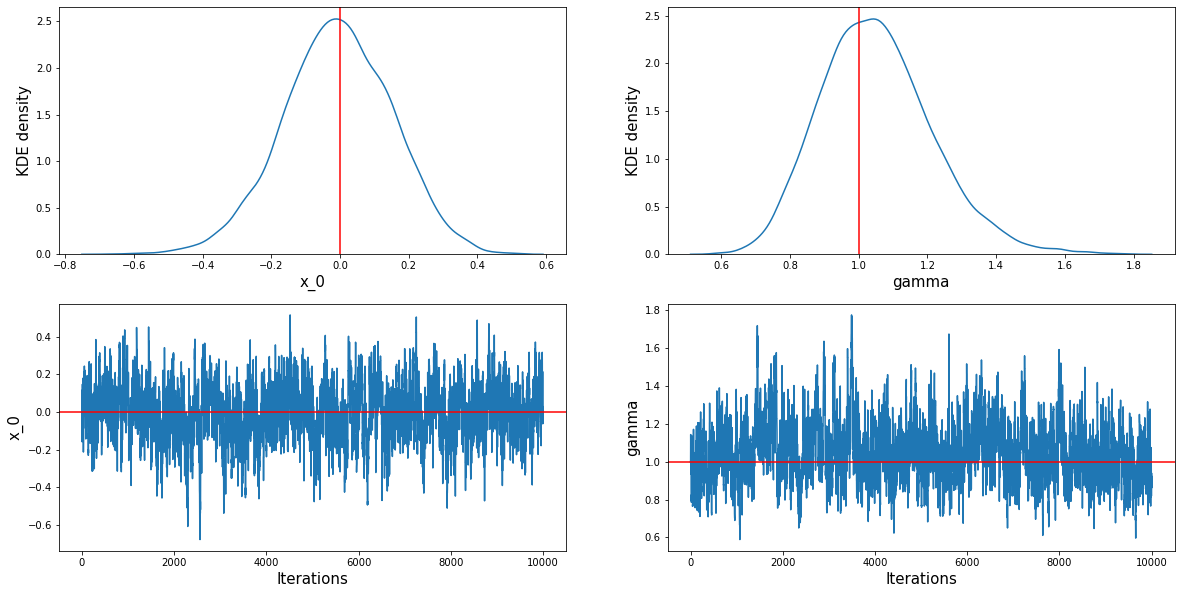

In [9]:
display_chains(Cauchy_med_MAD, true_par=[0,1])